## Linear Regression

In [1]:
# Data Pre-Processong & Visualization Imports
import numpy as np
import pandas as pd

from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Machine Learning Imports
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
# dataset

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = (raw_df.values[1::2, 2])

df = DataFrame(data,
              columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

In [4]:
# The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
#  prices and the demand for clean air', J. Environ. Economics & Management,
#  vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
# ...', Wiley, 1980.   N.B. Various transformations are used in the table on
# pages 244-261 of the latter.

# Variables in order:
# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's'''

In [5]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Data Visualization

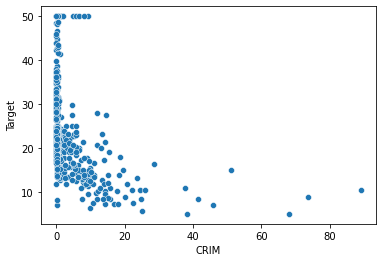

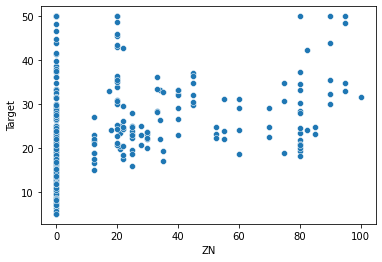

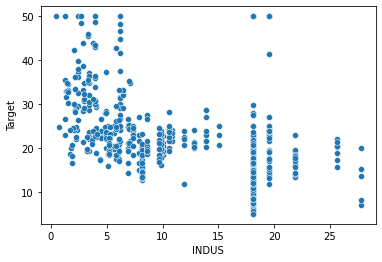

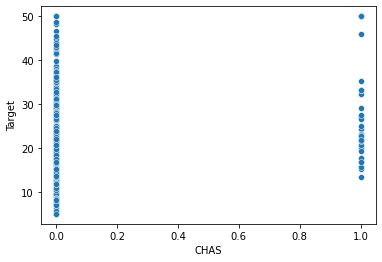

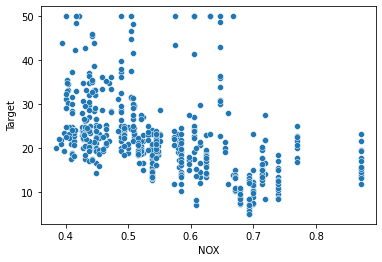

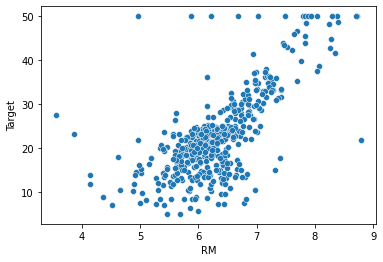

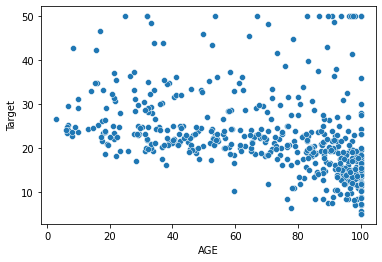

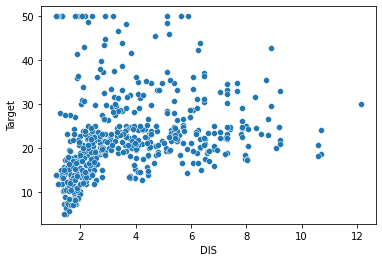

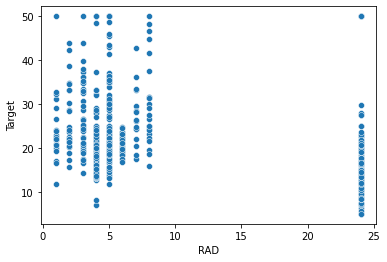

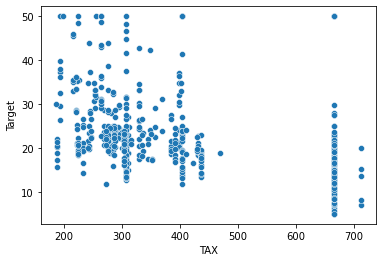

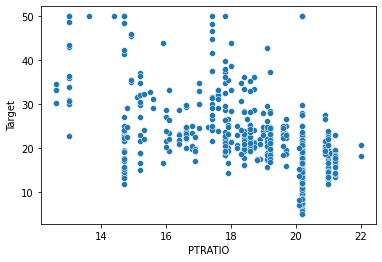

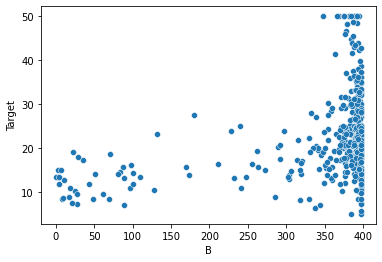

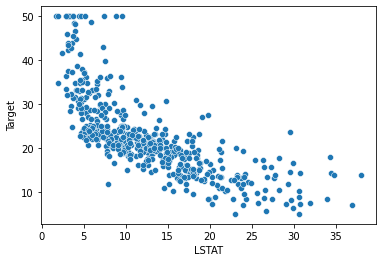

<Figure size 432x288 with 0 Axes>

In [7]:
# visualizing relationship between Features and Target
for feature in df.columns:
    sns.scatterplot(x=df[feature],y=target)
    
    plt.ylabel('Target')
    plt.figure()

---------

### Data Pre-processing

In [8]:
X = data
y = target

In [9]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y)

In [10]:
# adding X0 = 1
X_train = np.insert(X_train,0,np.ones((379)),axis=1)
X_test = np.insert(X_test,0,np.ones(X_test.shape[0]),axis=1)

### Normal Equation

In [11]:
# Normal Equation
Theta = np.dot(np.dot((np.linalg.inv(np.matmul(np.transpose(X_train),X_train))),np.transpose(X_train)),y_train)
Theta

array([ 3.61336698e+01, -5.85413401e-02,  4.34321138e-02,  7.19282497e-02,
        2.13490036e+00, -1.97454074e+01,  4.01625443e+00, -3.05711324e-03,
       -1.31944624e+00,  2.96617819e-01, -1.37513177e-02, -1.03949794e+00,
        1.08490666e-02, -4.51206055e-01])

In [12]:
# Another way of getting the expression @ Normal Equation
T = np.dot(y_train,np.dot(X_train,(np.linalg.inv(np.dot(np.transpose(X_train),X_train)))))
T

array([ 3.61336698e+01, -5.85413401e-02,  4.34321138e-02,  7.19282497e-02,
        2.13490036e+00, -1.97454074e+01,  4.01625443e+00, -3.05711324e-03,
       -1.31944624e+00,  2.96617819e-01, -1.37513177e-02, -1.03949794e+00,
        1.08490666e-02, -4.51206055e-01])

In [13]:
prediction = np.dot(X_test,Theta)

In [14]:
# R2 SCORE w.r.t Normal Equation
sklearn.metrics.r2_score(y_test,prediction)

0.657545405833706

In [15]:
# using sklearn.linear_model
lreg = LinearRegression()

lreg.fit(X_train,y_train)
default_pred = lreg.predict(X_test)

# R2 SCORE w.r.t sklearn fit method
sklearn.metrics.r2_score(y_test,default_pred)

0.6575454058337074

### Gradient Descent

In [16]:
# applying normalization to features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
# adding X0 = 1
X_train = np.insert(X_train,0,np.ones((X_train.shape[0])),axis=1)
X_test = np.insert(X_test,0,np.ones((X_test.shape[0])),axis=1)

In [18]:
# training example size
m = X_train.shape[0]

# number of features
features = X_train.shape[1]

Text(0, 0.5, 'Cost Function')

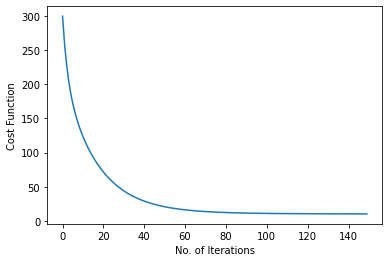

In [19]:
# learning rate
alpha = .03

# initialising theta
Theta = np.random.randn(features)

# initialising cost list to store cost function values
J = []

# epoch/iterations
iterations = 150

# just abbreviating mean squared error function
mse = metrics.mean_squared_error

for i in range(iterations):
    
    y_pred = np.dot(X_train,Theta)
    
    cost = (1/(2*m))*np.sum((y_pred-y_train)**2)
    J.append(cost)
    
    gradient = np.dot(X_train.T,(y_pred-y_train))
    Theta = Theta - (alpha/m)*gradient
    
    
#gradient checking
plt.plot(range(iterations),J)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost Function')

In [20]:
Theta

array([22.11733539,  0.546312  , -0.48147656,  0.84156597, -0.45126   ,
        0.6496701 , -1.18785962,  2.73846794,  0.32213105, -2.06141534,
        1.2607208 , -0.97522121, -1.99270096,  0.76849606, -3.83854673])

In [21]:
y_pred = np.dot(X_test,Theta)
metrics.r2_score(y_test,y_pred)

0.6690744388148795

## Regularization

### Using Cross-Validation to get optimal value of Regularization Parameter

In [22]:
# selecting different values for alpha
alphas = np.arange(0,100,10)
scores = []
for alpha in alphas:
    
    estimator = Ridge(alpha=alpha)
    score = model_selection.cross_val_score(estimator,X_train,y_train,cv=5)
    
    scores.append([alpha,np.mean(score),np.std(score)])

In [23]:
# creating Dataframe to store candidate alphas
candidate_alphas = DataFrame(scores,columns=['alpha','mean_accuracy','std'])
candidate_alphas

,alpha,mean_accuracy,std
0,0,0.700166,0.120901
1,10,0.721758,0.105964
2,20,0.722043,0.105617
3,30,0.721429,0.104819
4,40,0.720216,0.103950
5,50,0.718565,0.103119
6,60,0.716580,0.102353
7,70,0.714336,0.101655
8,80,0.711889,0.101018
9,90,0.709283,0.100434


<AxesSubplot:xlabel='alpha'>

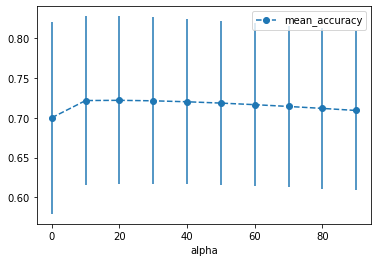

In [24]:
# plotting a gaph of means and stds of the scores for each candidate value of alpha
candidate_alphas.plot(x='alpha',y='mean_accuracy',
                      yerr='std',
                     marker='o',
                     linestyle='--')

In [25]:
# getting the value of alpha for maximum accuracy
max_acc = np.max(candidate_alphas.mean_accuracy)
candidate_alphas[candidate_alphas.mean_accuracy==max_acc]

,alpha,mean_accuracy,std
2,20,0.722043,0.105617


### Applying Regularization using Gradient Descent

Text(0, 0.5, 'Cost Function')

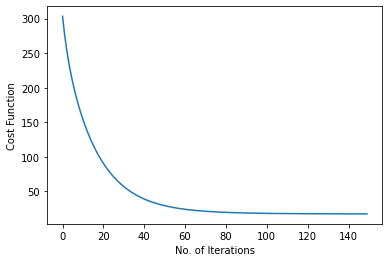

In [26]:
# choosing learning rate
alpha = .03

# initialising theta
Theta = np.random.randn(features)

# regularized gradient descent
J = []
iterations = 150
reg_par = 10

for i in range(iterations):
    
    y_pred = np.dot(X_train,Theta)
    
    cost = (1/(2*m))*(np.sum((y_pred-y_train)**2)+np.sum(reg_par*(Theta**2)))
    J.append(cost)
    
    gradient = np.dot(X_train.T,(y_pred-y_train))+reg_par*Theta
    Theta = Theta - (alpha/m)*gradient
    

#gradient checking
plt.plot(range(iterations),J)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost Function')

In [27]:
Theta

array([21.55493707, -1.83624236, -0.56244639,  0.38519349, -0.1159355 ,
        0.63863332, -1.30720965,  3.05075941,  0.05992295, -1.48827551,
        1.36961166, -0.9701818 , -2.19855072,  0.79335549, -3.25302991])

In [28]:
y_pred = np.dot(X_test,Theta)
metrics.r2_score(y_test,y_pred)

0.636935750182294

--------------